# DATA SCIENCE VIRTUAL INTERNSHIP PROGRAM - LETS GROW MORE¶

# BEGINNER TASK-2 : Stock Market Prediction and Forecasting using Stacked LSTM

In [101]:
#import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#loading the dataset
data_set = pd.read_csv(r"C:\Users\Nikhileswari Puvvula\Documents\datasets\Stock_data.csv")

In [13]:
data_set.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [14]:
# checking for no.of row and columns in the data
data_set.shape

(2035, 8)

In [15]:
data_set.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [16]:
# Checking for NULL values
data_set.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

Hence this dataset doesn't contain any null values

In [17]:
data=data_set.sort_values(by='Date')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [18]:
data.reset_index(inplace=True)
data.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# Prediction and Forecasting for 'CLOSE' Data

Text(0.5, 1.0, 'Closing Data plot')

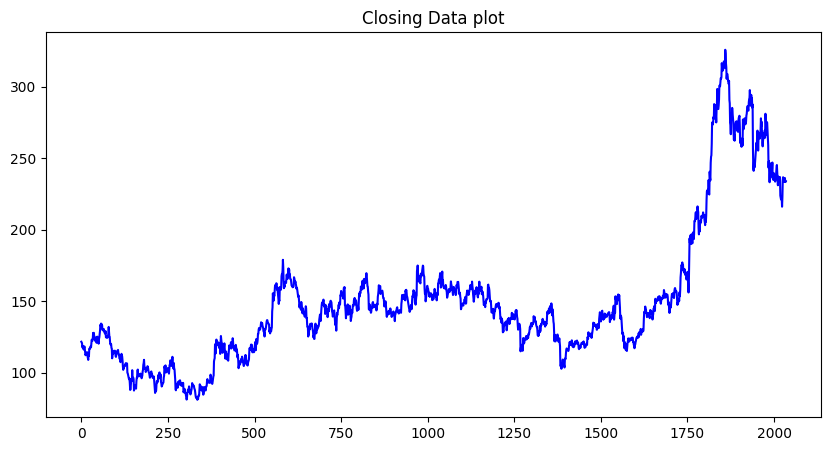

In [63]:
plt.figure(figsize=(10,5))
plt.plot(data['Close'],color='blue')
plt.title("Closing Data plot")

In [20]:
df1 = data['Close']
df1

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [96]:
# performing Scaling on the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

Data values are scaled to values between 0 and 1

In [23]:
#performing train and test split of data
train_size = int(len(df1)*0.80)
test_size = len(df1)-train_size
train_data,test_data = df1[0:train_size,:],df1[train_size:len(df1),:1]

Training data is 80% and Testing data is 20%

In [24]:
train_size,test_size

(1628, 407)

In [25]:
# method for creating the training and testing data in required format
def createDataset(data_set,seq_len=1):
    x,y=[],[]
    for i in range(len(data_set)-seq_len-1):
        a=data_set[i:(i+seq_len),0]
        x.append(a)
        y.append(data_set[i+seq_len,0])
    return np.array(x),np.array(y)
 

In [98]:
seq_len = 100
x_train,y_train = createDataset(train_data,seq_len)
x_test,y_test=createDataset(test_data,seq_len)

In [99]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [100]:
#importing libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_6 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
# training the model with the training data
model.fit(x_train,y_train)

48/48 [==============================] - 18s 176ms/step - loss: 0.0059


In [33]:
prediction = model.predict(x_test)

10/10 [==============================] - 3s 55ms/step


In [37]:
from sklearn.metrics import mean_squared_error
import math as m
performance= m.sqrt(mean_squared_error(y_test,prediction))
performance

0.08285361544833553

hence less error

In [44]:
new_data = {"ytest_Actual" : y_test.reshape(-1) , "ytest_predicted" : prediction.reshape(-1)}

In [45]:
df = pd.DataFrame(new_data)

In [46]:
df

,ytest_Actual,ytest_predicted
0,0.295752,0.285578
1,0.313725,0.284901
2,0.349673,0.284505
3,0.361724,0.284745
4,0.379085,0.285816
...,...,...
301,0.627655,0.575918
302,0.622345,0.575343
303,0.633783,0.575259
304,0.626225,0.575653


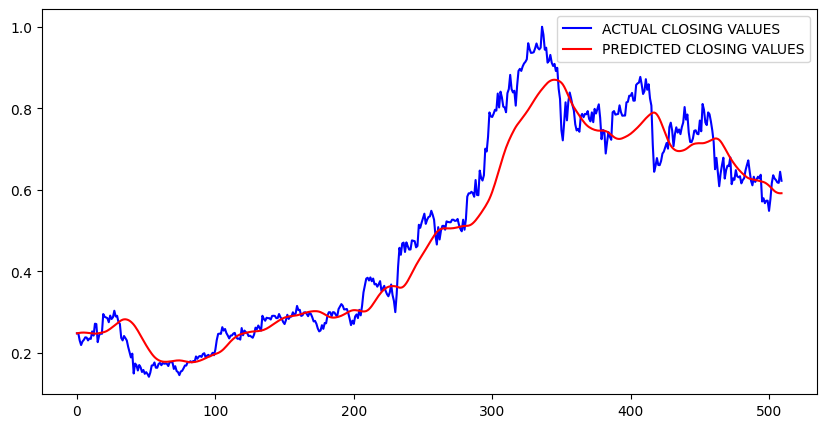

In [106]:
plt.figure(figsize=(10,5))
plt.plot(df['ytest_Actual'],color='blue')
plt.plot(df['ytest_predicted'],color='red')
plt.legend(['ACTUAL CLOSING VALUES','PREDICTED CLOSING VALUES'],loc='upper right')

# Prediction and Forecast for 'OPEN' Data

Text(0.5, 1.0, 'Opening Data plot')

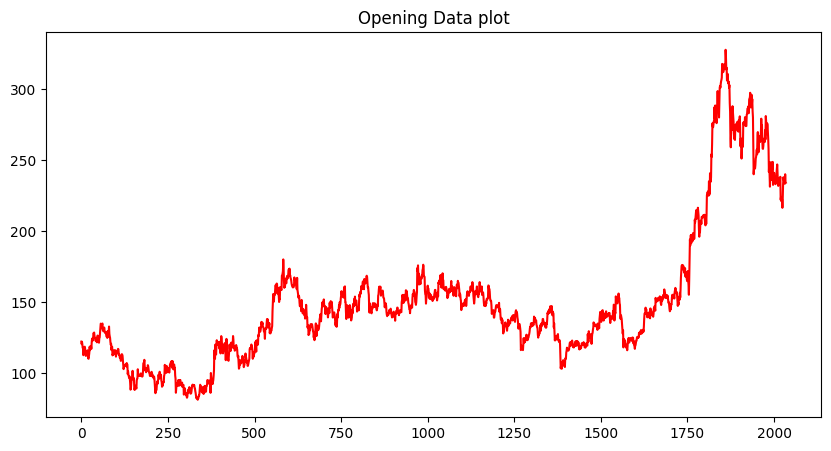

In [64]:
plt.figure(figsize=(10,5))
plt.plot(data['Open'],color='red')
plt.title("Opening Data plot")

In [65]:
df2 = data['Open']
df2

0       122.10
1       120.30
2       121.80
3       120.10
4       117.60
         ...  
2030    233.55
2031    233.30
2032    240.00
2033    234.55
2034    234.05
Name: Open, Length: 2035, dtype: float64

In [66]:
# performing Scaling on the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))
df2

array([[0.16626115],
       [0.15896188],
       [0.16504461],
       ...,
       [0.64436334],
       [0.62226277],
       [0.6202352 ]])

In [77]:
#performing train and test split of data
train_size = int(len(df2)*0.70)
test_size = len(df2)-train_size
train_data,test_data = df2[0:train_size,:],df2[train_size:len(df2),:1]

In [78]:
train_size,test_size

(1424, 611)

In [79]:
# method for creating the training and testing data in required format
def createDataset(data_set,seq_len=1):
    x,y=[],[]
    for i in range(len(data_set)-seq_len-1):
        a=data_set[i:(i+seq_len),0]
        x.append(a)
        y.append(data_set[i+seq_len,0])
    return np.array(x),np.array(y)

In [80]:
seq_len = 100
x_train,y_train = createDataset(train_data,seq_len)
x_test,y_test=createDataset(test_data,seq_len)

In [81]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [82]:
#importing libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [83]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [84]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_12 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_13 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [85]:
# training the model with the training data
model.fit(x_train,y_train)

42/42 [==============================] - 8s 77ms/step - loss: 0.0062


In [86]:
prediction = model.predict(x_test)

16/16 [==============================] - 2s 22ms/step


In [87]:
from sklearn.metrics import mean_squared_error
import math as m
performance= m.sqrt(mean_squared_error(y_test,prediction))
performance

0.060703879757876146

Hence error is less

In [88]:
new_data = {"ytest_Actual" : y_test.reshape(-1) , "ytest_predicted" : prediction.reshape(-1)}

In [89]:
df = pd.DataFrame(new_data)

In [90]:
df

,ytest_Actual,ytest_predicted
0,0.247972,0.248168
1,0.247770,0.248704
2,0.230333,0.249261
3,0.219384,0.249728
4,0.228102,0.249973
...,...,...
505,0.624088,0.594541
506,0.618208,0.592964
507,0.617194,0.592013
508,0.644363,0.591591


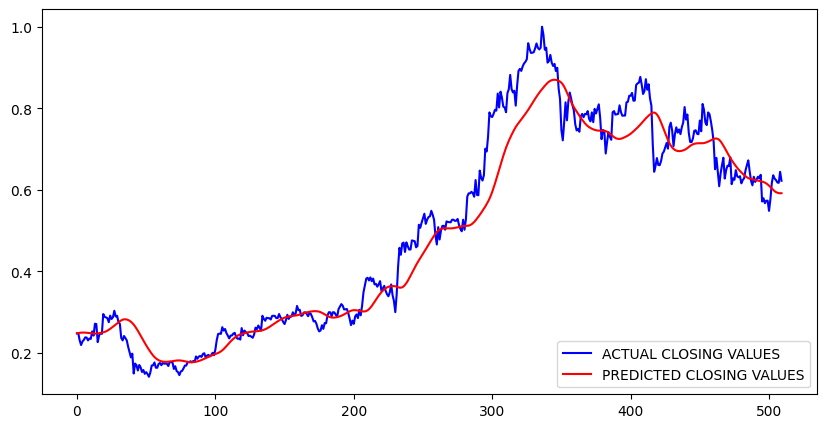

In [107]:
plt.figure(figsize=(10,5))
plt.plot(df['ytest_Actual'],color='blue')
plt.plot(df['ytest_predicted'],color='red')
plt.legend(['ACTUAL CLOSING VALUES','PREDICTED CLOSING VALUES'],loc='lower right')

# CONCLUSION:

Hence Predicted and Forecasted Stock Market Trends